# Linear classification

In [1]:
#library imports
import numpy as np
import random
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pickle as pl
from sklearn import datasets
from urllib.request import urlopen
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Problem 1:
## Linear classification: Synthetic dataset

### Task: Use the k-component version to linear classify synthetic data
We will use the k-component version throughout this assignment

Generate synthetic dataset consisting of two features and three classes.

In [2]:
# Hyperparameters for synthetic data generation

K = 3 # number of classes
d_in = 2 # input dimension

N = 200 # number of training examples

#minimum and maximum value of the output. Not required I guess
y_min = -25
y_max = 25

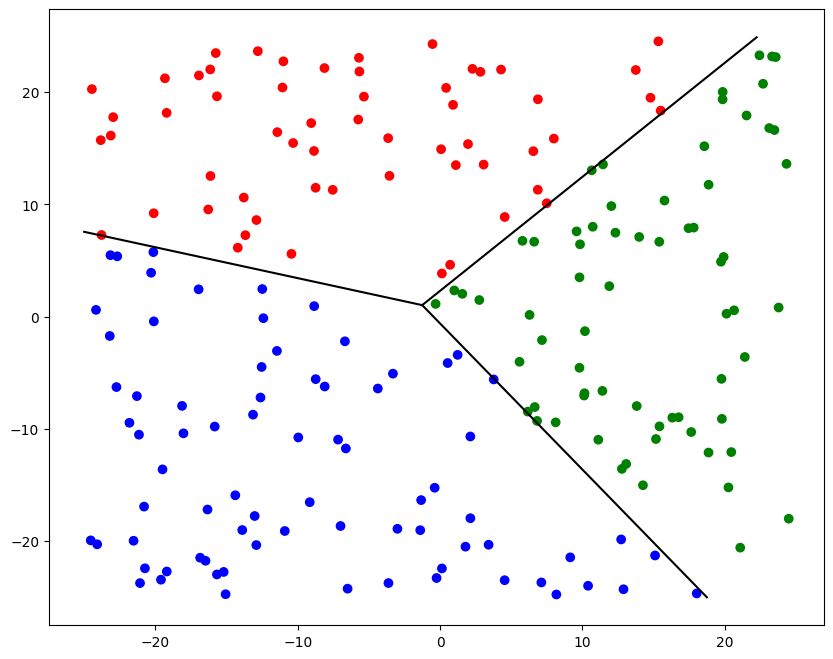

In [4]:
np.random.seed(42)  # random seed for reproducibility

# Generate synthetic W and b
Wstar = np.random.rand(K, d_in)
bstar = np.random.rand(K)

x = np.array([i-100 for i in range(N)])/4  # for making decision boundary

ystar = (-1)*np.array([((Wstar[i, 0] - Wstar[i-1, 0]) * x + (bstar[i] -
                                                             bstar[i-1])) / (Wstar[i, 1] - Wstar[i-1, 1]) for i in range(K)])

X = (np.random.rand(N, 2)-0.5)*50
Z = (Wstar @ X.transpose()).transpose() + bstar
Y = np.argmax(Z, axis=1) # label based on Z

# use colormap
colormap = np.array(['r', 'g', 'b'])

# Go along the kth line, (x[i], y[k,i]), along which z_k = z_k-1 . We want to make sure that z_k = z_k-1 are max of z_a along this line. Otherwise delete points.

for i in range(N):
    for k in range(K):
        x_line = [x[i], ystar[k, i]]
        z_line = Wstar @ x_line + bstar

        zmax = np.around(z_line.max(0), 2)
        zk = np.around(z_line[k], 2)

        if (zmax != zk):
            ystar[k, i] = np.nan
        if (ystar[k, i] > y_max) | (ystar[k, i] < y_min):
            ystar[k, i] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=colormap[Y])
ax.plot(x, ystar[0], color='black')
ax.plot(x, ystar[1], color='black')
ax.plot(x, ystar[2], color='black')

### Task: Implement a linear classifier using SGD. The implementation should only use NumPy.

Epoch: 1, Loss: 0.25128587984116774 
Epoch: 11, Loss: 0.06539192357580981 
Epoch: 21, Loss: 0.07873618689808447 
Epoch: 31, Loss: 0.09104417168136741 
Epoch: 41, Loss: 0.09108145267663016 
Epoch: 51, Loss: 0.0801805153882127 
Epoch: 61, Loss: 0.07674354814367663 
Epoch: 71, Loss: 0.0740469221913471 
Epoch: 81, Loss: 0.07195243587987134 
Epoch: 91, Loss: 0.07037755518033538 
Loss at the end of training: 0.0693


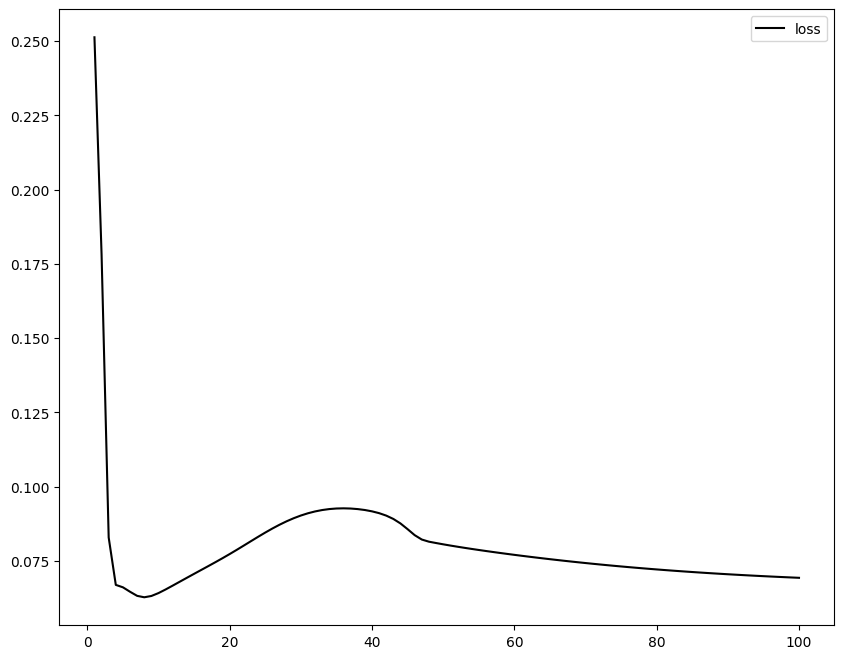

In [5]:
Wv = np.random.rand(K, d_in)
b = np.random.rand(K)

lr = 1e-2
num_iter = 100

############################## TO BE GRADED ####################################

# Plot the training loss as a function of number of steps

Y_array = ((np.arange(np.max(Y) + 1) == Y[:, True])).astype(float)


def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Prevent overflow
    return exp_z / exp_z.sum()


def loss(w, b, x, y):
    logits = w@x+b
    q = softmax(logits)

    return -y @ np.log(q)


def loss_grad(w, b, x, y):
    logits = w@x+b
    q = softmax(logits)
    # return q-y
    grad_w = np.outer(q-y, x)  # dL/dw = (prob - y) x
    grad_b = q-y  # dL/db = prob - y
    return grad_w, grad_b


losses = []
for n in range(num_iter):
    for i in range(len(X)):
        # stochastic gradient
        grad_Wv, grad_b = loss_grad(Wv, b, X[i], Y_array[i])
        Wv = Wv - lr * grad_Wv
        b = b - lr * grad_b

    losses.append(
        [n+1, np.mean(np.array([loss(Wv, b, X[i], Y_array[i]) for i in range(len(X))]))])
    if n % 10 == 0:
        print(
            f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(Wv, b, X[i], Y_array[i]) for i in range(len(X))]))} ")
        # print(Wv, b)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(np.array(losses)[:, 0], np.array(losses)
        [:, 1], color='black', label="loss")
ax.legend()

# Report the final loss after training
final_loss = np.mean(
    np.array([loss(Wv, b, X[i], Y_array[i]) for i in range(len(X))]))
print(f'Loss at the end of training: {final_loss:0.4f}')

### Task: obtain the decision boundaries from the solution above and plot them as we plotted in the beginning of this problem

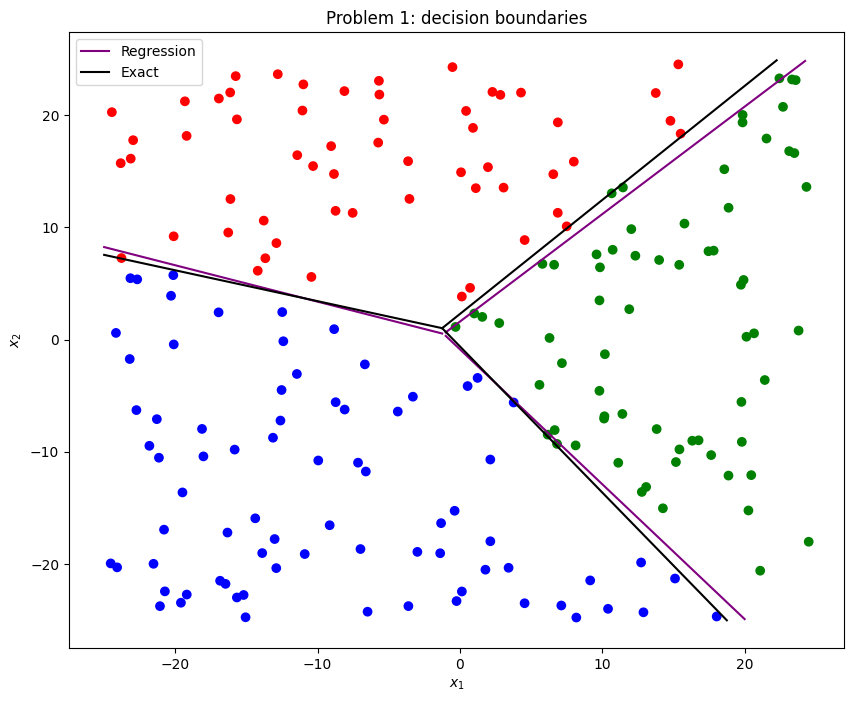

In [6]:
############################## TO BE GRADED ####################################

# Plot the predicted decision boundary from optimal values of W and b
# Use different colors for the true and prediceted decision boundaries

yv = (-1)*np.array([( (Wv[i,0]-Wv[i-1,0]) * x + b[i]-b[i-1])/(Wv[i,1]-Wv[i-1,1]) for i in range(K)])

for i in range(N):
  for k in range(K):
    x_line = [x[i], yv[k,i]]
    z_line = Wv @ x_line + b

    zmax = np.around(z_line.max(0),2)
    zk = np.around(z_line[k],2)

    if ( zmax != zk):
      yv[k,i] = np.nan
    if (yv[k,i] > y_max) | (yv[k,i] < y_min):
      yv[k,i] = np.nan

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(X[:,0],X[:,1], c=colormap[Y])
ax.plot(x,yv[0], color = 'purple', label='Regression')
ax.plot(x,yv[1], color = 'purple')
ax.plot(x,yv[2], color = 'purple')
ax.plot(x,ystar[0], color = 'black', label='Exact')
ax.plot(x,ystar[1], color = 'black')
ax.plot(x,ystar[2], color = 'black')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Problem 1: decision boundaries')
ax.legend()

# Problem 2:
## Linear classification: The iris dataset

The iris dataset consists of 50 examples of three species of flowers. For each example, it has four features: length and width of the sepals and petals.

In this problem, we will use two features and two classes for simplicity.

Let us begin by loading the iris dataset from the seaborn library.

In [7]:
# load the iris dataset; it returns a pandas dataframe
iris = sns.load_dataset("iris")
iris = iris[iris['species'] != 'virginica'] # use only two classes; drop class virginica
print(iris)

    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1.1  versicolor
99           5.7          2.8           4.1          1.3  versicolor

[100 rows x 5 columns]


Next, plot two features, 'sepal length' and 'petal_length', that we would be using in this problem

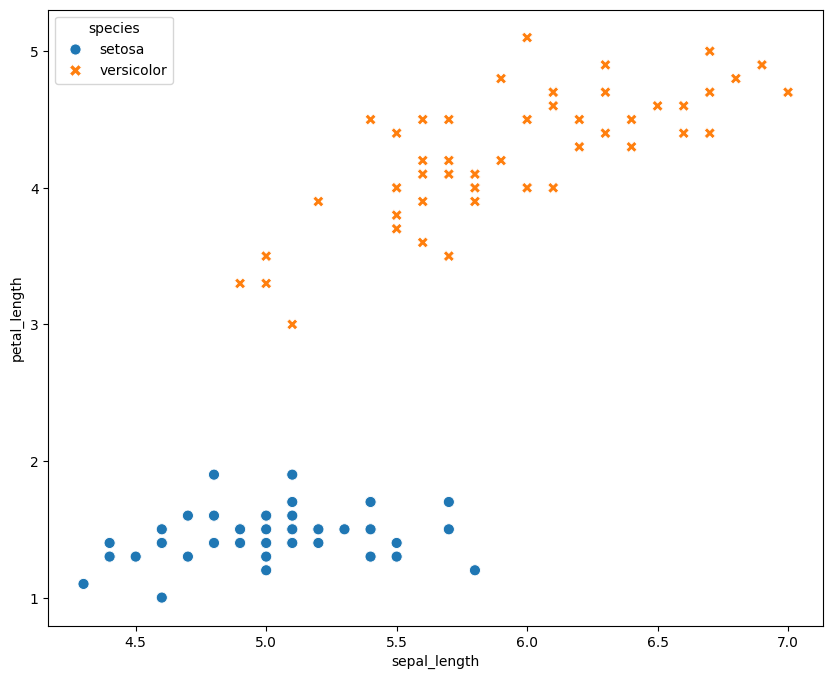

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.scatterplot(x = 'sepal_length', y = 'petal_length', hue = 'species', style = 'species', data = iris, s = 64)

Generate a dataset using the first two features and the labels

In [9]:
#use the sepal and petal length columns
X = iris[['sepal_length', 'petal_length']].values
# convert the strings to integers and
Y, index = pd.factorize(iris['species'])
print(X.shape, Y.shape)

(100, 2) (100,)


### Task: Implement linear classification solely in NumPy to classify the two classes of flowers.

Epoch: 1, Loss: -0.5092442695272404 
Epoch: 101, Loss: -0.8131139502877548 
Epoch: 201, Loss: -1.1243698462082847 
Epoch: 301, Loss: -1.2019676218494402 
Epoch: 401, Loss: -1.2194131211478207 
Epoch: 501, Loss: -1.2233285026229637 
Epoch: 601, Loss: -1.2242077417089443 
Epoch: 701, Loss: -1.2244052177055453 
Epoch: 801, Loss: -1.2244495723765325 
Epoch: 901, Loss: -1.2244595348789618 
Epoch: 1001, Loss: -1.2244617725612705 
Epoch: 1101, Loss: -1.2244622751683634 
Epoch: 1201, Loss: -1.2244623880592416 
Epoch: 1301, Loss: -1.2244624134157327 
Epoch: 1401, Loss: -1.2244624191110751 
Epoch: 1501, Loss: -1.2244624203902976 
Epoch: 1601, Loss: -1.2244624206776284 
Epoch: 1701, Loss: -1.224462420742164 
Epoch: 1801, Loss: -1.2244624207566688 
Epoch: 1901, Loss: -1.2244624207599342 
Classification accuracy: 1.00


<Axes: xlabel='sepal_length', ylabel='petal_length'>

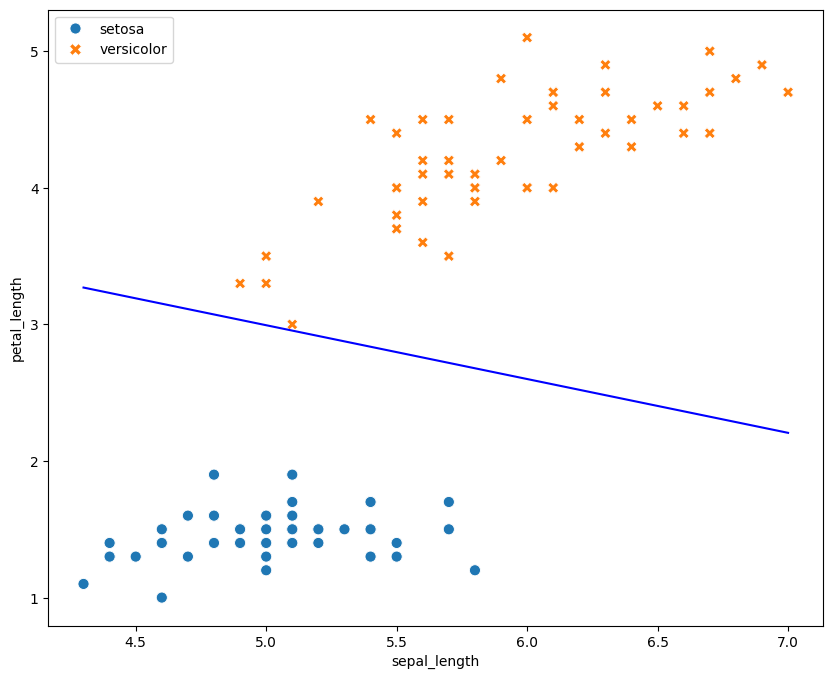

In [10]:
K = 1
d_in = 2

np.random.seed(42)

w = np.random.rand(d_in)
b = np.random.rand(K)

lr = 1e-3
num_iter = 2000


def sigmoid(z):
    return 1./(1.+np.exp(-z))


def loss(w, b, x, y):
    logits = w@x+b
    q = sigmoid(logits)

    return -y * np.log(q) - (1-y) * (1-np.log(q))


def loss_grad(w, b, x, y):
    logits = w@x + b
    q = sigmoid(logits)

    grad_w = (q-y)*x  # dL/dw = (prob - y) * x
    grad_b = q - y  # dL/db = prob - y
    return grad_w, grad_b


# Plot the training loss as a function of number of steps
losses = []
for n in range(num_iter):
    for i in range(len(X)):
        # stochastic gradient
        grad_Wv, grad_b = loss_grad(w, b, X[i], Y[i])
        Wv = Wv - lr * grad_Wv
        b = b - lr * grad_b

    losses.append(
        [n+1, np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))])
    if n % 100 == 0:
        print(
            f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))} ")


def loss01(w, b, x, y):
    pred = (np.sign(x @ w.T + b[0]) + 1) / 2
    # pred = np.array(list(map(lambda z: np.sign(w@z+b[0]), x)))/2 + 0.5

    return (y == pred).astype(float).mean()


accuracy = loss01(w, b, X, Y)


################################ TO BE GRADED ##################################
# expected value is 1.00
print(f'Classification accuracy: {accuracy:0.2f}')

# use W, b to estimate the prediction boundary
w1, w2 = w[0], w[1]
b = b[0]

# Calculate the line corresponding to the decision boundary

################################ TO BE GRADED ##################################

# Plot the data in the input space with the decision boundary.
# Use different colors for the two classes

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.scatterplot(x='sepal_length', y='petal_length',
                     hue='species', style='species', data=iris, s=64)

x_boundary = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_boundary = -(b + w1 * x_boundary) / w2

sns.lineplot(x=x_boundary, y=y_boundary, color="blue")

We observe that there can be many deicsion boundaries which will yeild a 100% accuracy. The above decision boundary is not optimal as it does not maximize the margin from each class.

# Problem 3:

## Linear classification: The MNIST dataset

In this problem, we will classify MNIST digits using linear classification

Helper functions for loading and normalizing dataset. You may want to uncomment the one-hot label encoding in the load_data function

In [11]:
# Helper functions
def _one_hot(x, k, dtype=np.float32):
    """Create a one-hot encoding of x of size k."""
    return np.array(x[:, None] == np.arange(k), dtype)


def _standardize(x):
    """Standardization per sample across feature dimension."""
    axes = tuple(range(1, len(x.shape)))
    mean = np.mean(x, axis=axes, keepdims=True)
    std_dev = np.std(x, axis=axes, keepdims=True)
    return (x - mean) / std_dev


def load_data(dataset, num_classes):
    """
    loads mnist dataset from google drive
    """

    path = f'../datasets/{dataset}/{dataset}.dump'
    in_file = open(path, 'rb')
    (x_train, y_train), (x_test, y_test) = pl.load(in_file)

    # flatten x_train and x_test
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)

    # get info about the numner of training and testing exammples
    num_train = x_train.shape[0]
    num_test = x_test.shape[0]

    # standardize input
    x_train, x_test = _standardize(x_train), _standardize(x_test)

    # get one hot encoding for the labels
    # y_train = _one_hot(y_train, num_classes)
    # y_test = _one_hot(y_test, num_classes)

    return (x_train, y_train), (x_test, y_test), (num_train, num_test)

Load the MNIST dataset and normalize it

In [12]:
dataset = 'mnist'
# you may wanna specify the number of classes for one-hot encoding
classes = 10

(x_train, y_train), (x_test, y_test), info = load_data(dataset, classes)

Let us plot a few images from the training dataset

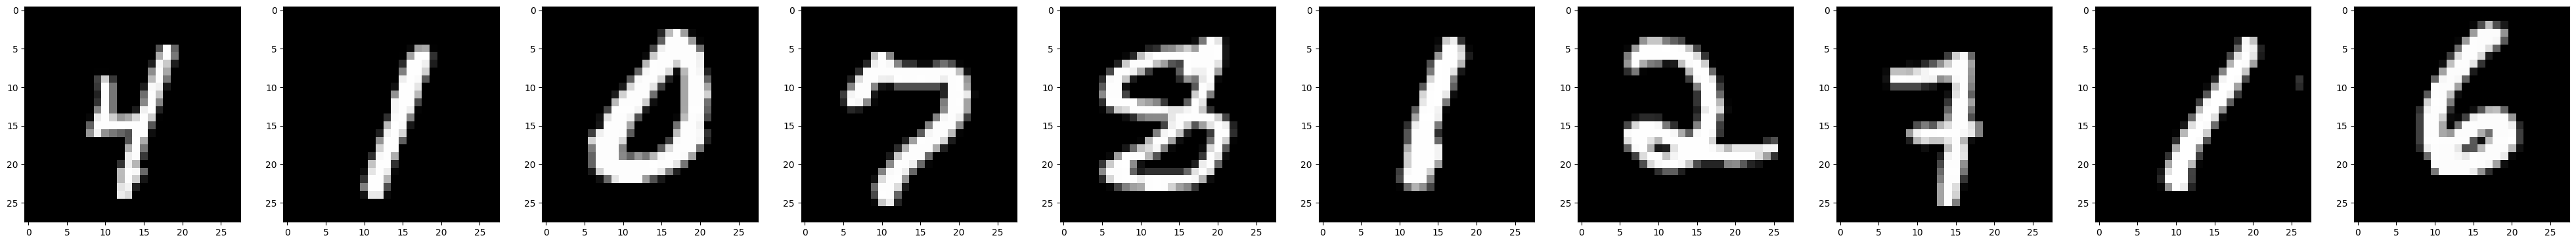

In [13]:
# Plot images here
num_plot = 10 # number of images to plot
x_plot = x_train[:10].reshape(-1, 28, 28)

fig, axes = plt.subplots(1, 10, figsize = (50, 8))

for i in range(num_plot):
    axes[i].imshow(x_plot[i], cmap = 'gray')

### Task: Implement linear classification to classify MNSIT data images and obtain the training and test accuracy. Implementation should be in NumPy only

In [14]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [15]:
# fit the data

K = 10
d_in = 784

np.random.seed(42)

w = np.random.rand(K, d_in)
b = np.random.rand(K)

lr = 1e-2
num_iter = 10000

l2 = 1e-3


def softmax(z):
    return np.exp(z)/(np.exp(z).sum())


y_train_array = _one_hot(y_train, K)
y_test_array = _one_hot(y_train, K)


def loss(w, b, x, y, l2):  # add l2-regularization
    logits = w@x+b
    q = softmax(logits)

    return -y @ np.log(q) + l2/2 * np.sum(w**2)


def loss_grad(w, b, x, y, l2):
    logits = w@x+b
    q = softmax(logits)

    grad_w = np.outer(q-y, x)
    grad_b = q-y
    return grad_w + l2*w, grad_b


# Plot the training loss as a function of number of steps

losses = []
for n in range(num_iter):
    for i in range(len(X)):
        # stochastic gradient
        grad_w, grad_b = loss_grad(w, b, x_train[i], y_train_array[i], l2)
        w = w - lr * grad_w
        b = b - lr * grad_b

    losses.append([n+1, np.mean(np.array([loss(w, b, x_train[i],
                  y_train_array[i], l2) for i in range(len(X))]))])
    if n % 1000 == 0:
        print(
            f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(w, b, x_train[i], y_train_array[i], l2) for i in range(len(X))]))} ")


def acc(w, b, X, Y):
    pred = np.argmax(softmax(X @ w.T + b), axis=1)
    # pred = np.array(list(map(lambda z: np.argmax(softmax(w@z+b)), X)))
    return (Y == pred).astype(float).mean()

################################ TO BE GRADED ##################################


# Estimate the training and test accuracy
# Expected test accuracy is at least 85%
train_accuracy = acc(w, b, x_train, y_train)
test_accuracy = acc(w, b, x_test, y_test)
print(
    f'Train accuracy: {train_accuracy:0.2f}, Test accuracy: {test_accuracy:0.2f}')

Epoch: 1, Loss: 3.029003802912632 
Epoch: 1001, Loss: 0.17847808234101925 
Epoch: 2001, Loss: 0.02881226822482375 
Epoch: 3001, Loss: 0.008605615562600071 
Epoch: 4001, Loss: 0.005874608787656597 
Epoch: 5001, Loss: 0.005504974446336674 
Epoch: 6001, Loss: 0.0054546127795981995 
Epoch: 7001, Loss: 0.005447434005413227 
Epoch: 8001, Loss: 0.005446099751072181 
Epoch: 9001, Loss: 0.005445559518000032 
Train accuracy: 0.73, Test accuracy: 0.73


We can visualize what the model has learnt by plotting the elements of the weight matrices as images.


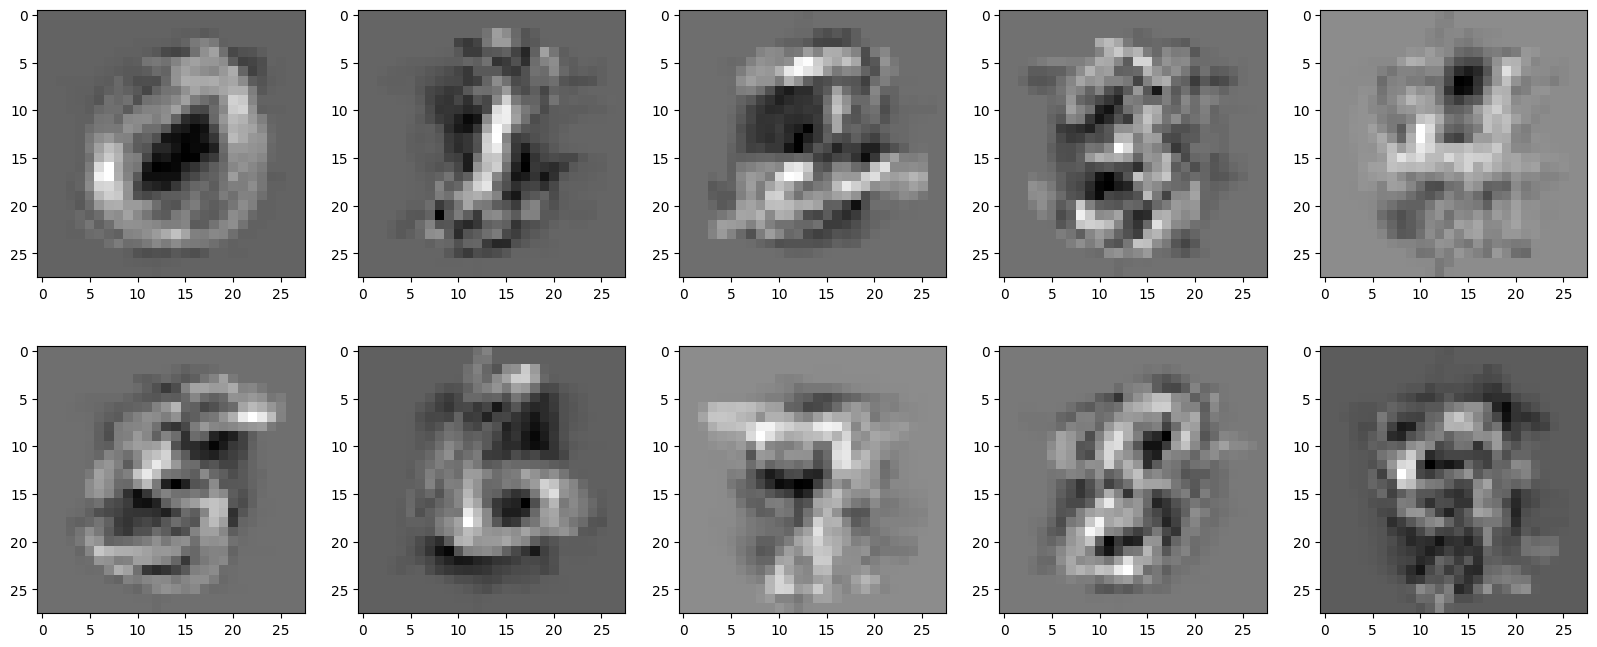

In [16]:
# obtain the optimal weights and biases
opt_W = w
opt_b = b
# reshape the weights to shape (10, 28, 28) and plot 10 images of shape (28, 28)

W = opt_W.reshape(10, 28,28)

fig, axes = plt.subplots(2, 5, figsize = (20, 8))
for i in range(5):
  for j in range(2):
    axes[j,i].imshow(W[j*5 + i], cmap='gray')


# Problem 4:
## Linear classification: Classification of the Ising phases

In this problem, we will classify the two Ising phases using logistic regression.

Credits for the Ising dataset: https://arxiv.org/abs/1803.08823



In [17]:
np.random.seed(42) # shuffle random seed generator

# Ising model parameters
L = 40 # linear system size
J = -1.0 # Ising interaction
T = np.linspace(0.25, 4.0, 16) # set of temperatures
T_c = 2.26 # Onsager critical temperature in the TD limit

Load dataset

In [18]:
# url to data
url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/'

# LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"


# DATA
# pickle reads the file and returns the Python object (1D array, compressed bits)
data = pl.load(urlopen(url_main + data_file_name))
# Decompress array and reshape for convenience
data = np.unpackbits(data).reshape(-1, 1600)
data = data.astype('int')
# map 0 state to -1 (Ising variable can take values +/-1)
data[np.where(data == 0)] = -1

# LABELS (convention is 1 for ordered states and 0 for disordered states)
# pickle reads the file and returns the Python object (here just a 1D array with the binary labels)
labels = pl.load(urlopen(url_main + label_file_name))

In [19]:
# define ML parameters
num_classes = 2
train_to_test_ratio = 0.5  # training samples

# divide data into ordered, critical and disordered
X_ordered = data[:70000, :]
# Y_ordered = labels[:70000]
Y_ordered = np.zeros(X_ordered.shape[0]).astype(int)

# X_critical = data[70000:100000,:]
# Y_critical = labels[70000:100000]

X_disordered = data[100000:, :]
# Y_disordered = labels[100000:]
Y_disordered = np.ones(X_disordered.shape[0]).astype(int)

# define training and test data sets
X = np.concatenate((X_ordered, X_disordered))
Y = np.concatenate((Y_ordered, Y_disordered))

# pick random data points from ordered and disordered states
# to create the training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=train_to_test_ratio, test_size=1.0-train_to_test_ratio)

Let us plot the distribution of magnetization

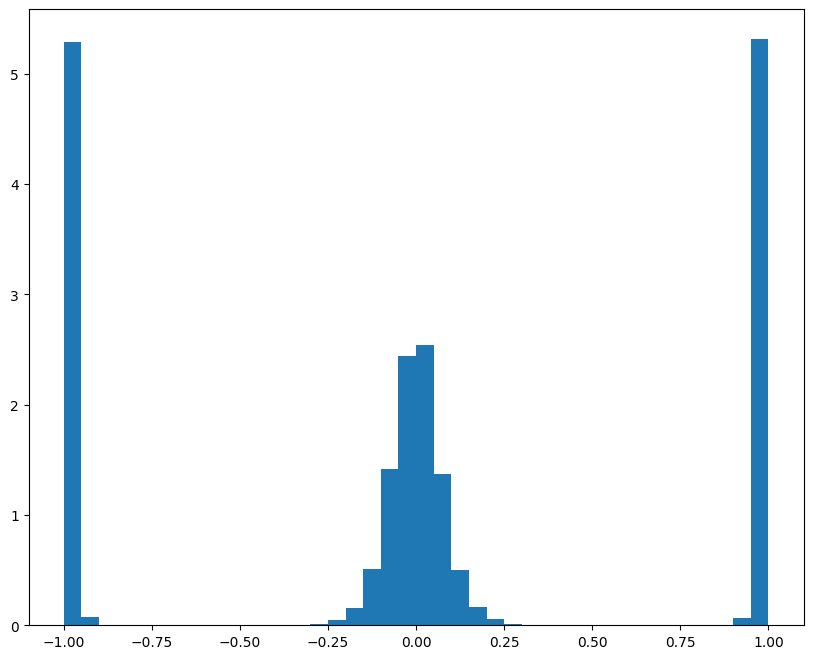

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
means = X_train.mean(axis=1)
_ = ax.hist(means, bins=40, density=True)

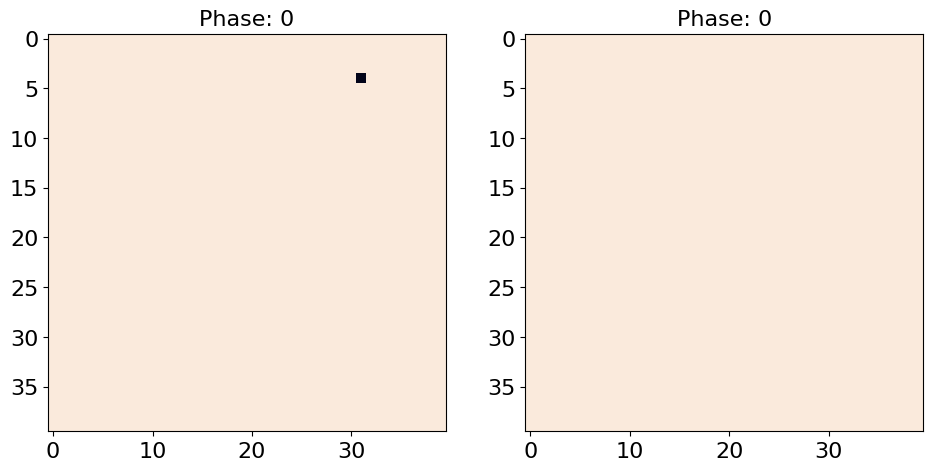

In [21]:
# plot a few Ising states

# set colourbar map
cmap_args = dict(cmap='rocket_r')

# plot states
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axes[0].imshow(X_train[1].reshape(L, L), **cmap_args)
axes[0].set_title(f'Phase: {Y_train[1]}', fontsize=16)
axes[0].tick_params(labelsize=16)

im = axes[1].imshow(X_train[0].reshape(L, L), **cmap_args)
axes[1].set_title(f'Phase: {Y_train[0]}', fontsize=16)
axes[1].tick_params(labelsize=16)

fig.subplots_adjust(right=1.0)

plt.show()

Task: Implement linear classification to classify the two Ising phases and report the final training and test accuracy

In [22]:
X_train.shape, Y_train.shape, Y_train.min(), Y_train.max()

((65000, 1600), (65000,), np.int64(0), np.int64(1))

In [23]:
K = 1
d_in = X_train.shape[1]

np.random.seed(42)

w = np.random.rand(d_in) / np.sqrt(d_in)
b = np.random.rand(K)

lr = 1e-8
num_iter = 10


def sigmoid(z):
    # avoid overflow
    return np.where(z >= 0, 1. / (1. + np.exp(-z)), np.exp(z) / (1. + np.exp(z)))


def loss(w, b, x, y):
    logits = w@x+b
    q = sigmoid(logits)

    return -y * np.log(q) - (1-y) * (1-np.log(q))


def loss_grad(w, b, x, y):
    logits = w@x+b
    q = sigmoid(logits)

    grad_w = (q-y)*x
    grad_b = q-y
    return grad_w, grad_b


# Plot the training loss as a function of number of steps
losses = []
for n in range(1, num_iter+1):
    for i in range(len(X_train)):
        # stochastic gradient
        grad_w, grad_b = loss_grad(w, b, X_train[i], Y_train[i])
        w = w - lr * grad_w
        b = b - lr * grad_b

    losses.append([n, np.mean(np.array([loss(w, b, X_test[i], Y_test[i])
                  for i in range(len(X_test))]))])
    if n % 10 == 0:
        print(
            f"Epoch: {n}, Loss: {np.mean(np.array([loss(w, b, X_test[i], Y_test[i]) for i in range(len(X_test))]))}")


def loss01(w, b, x, y):
    pred = (np.sign(x @ w.T + b[0]) + 1) / 2

    return (y == pred).astype(float).mean()


train_accuracy = loss01(w, b, X_train, Y_train)
test_accuracy = loss01(w, b, X_test, Y_test)

############################## TO BE GRADED ####################################
# Expected test accuracy > 65%
print(
    f'Training accuracy: {train_accuracy:0.4f}, Test accuracy: {test_accuracy:0.4f}')

Epoch: 10, Loss: -4.672479883260159
Training accuracy: 0.5298, Test accuracy: 0.5289


### Bonus problem: The Ising model phases can be separated using Magentization (average value of spins). Is it possible to get 100% classification accuracy using linear classification? If not, whats the problem?

# Problem 5:
## K-nearest neighbors

In this problem, we will look into a dataset which is hard to resolve using linear classification, but is easier to solve with the k-nearest neighbors method.

In particular, we will sample data from two concentric circles with different radius and attempt to classify them using linear classification and k nearest neighbours.

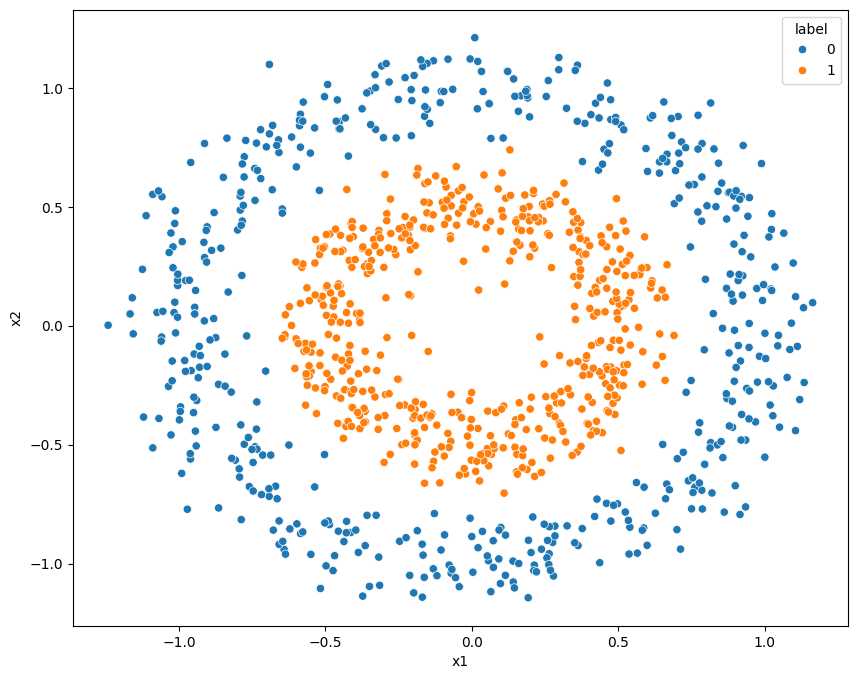

In [24]:
#generate a dataset with 1000 examples
n_samples = 1000
X, Y = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.1)

circles = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'label': Y})

# Let us look how the data looks like in the feature space x1, x2

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.scatterplot(x = 'x1', y = 'x2', hue = 'label', data = circles)

In [25]:
# Split the dataset into training and testing
split_fraction = 0.8
split = int(split_fraction*n_samples)

X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

### Task: Use linear classification to classify the above data and plot decision boudnaries

In [26]:
X.shape, Y.min(), Y.max(), X.min(), X.max()

((1000, 2),
 np.int64(0),
 np.int64(1),
 np.float64(-1.2421757399062756),
 np.float64(1.2104887508378792))

Epoch: 1, Loss: -0.501524113269858 
Epoch: 101, Loss: -0.49768830347429727 
Epoch: 201, Loss: -0.4976883034108527 
Epoch: 301, Loss: -0.4976883034108527 
Epoch: 401, Loss: -0.4976883034108527 
Epoch: 501, Loss: -0.4976883034108527 
Epoch: 601, Loss: -0.4976883034108527 
Epoch: 701, Loss: -0.4976883034108527 
Epoch: 801, Loss: -0.4976883034108527 
Epoch: 901, Loss: -0.4976883034108527 
Epoch: 1001, Loss: -0.4976883034108527 
Epoch: 1101, Loss: -0.4976883034108527 
Epoch: 1201, Loss: -0.4976883034108527 
Epoch: 1301, Loss: -0.4976883034108527 
Epoch: 1401, Loss: -0.4976883034108527 
Epoch: 1501, Loss: -0.4976883034108527 
Epoch: 1601, Loss: -0.4976883034108527 
Epoch: 1701, Loss: -0.4976883034108527 
Epoch: 1801, Loss: -0.4976883034108527 
Epoch: 1901, Loss: -0.4976883034108527 
Train accuracy: 0.50, Test accuracy: 0.4800


<Axes: xlabel='x1', ylabel='x2'>

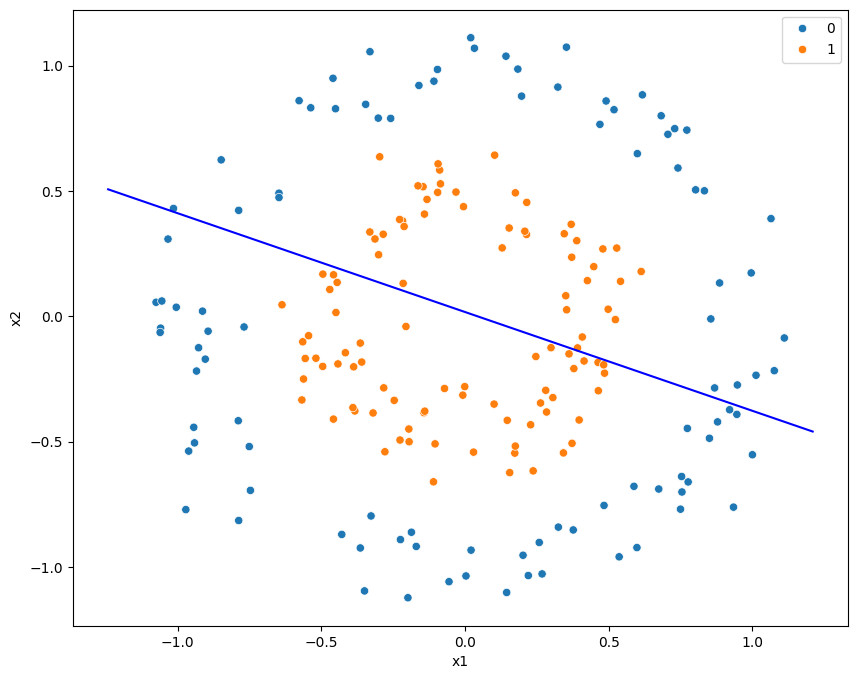

In [27]:
K = 1
d_in = 2

np.random.seed(42)

w = np.random.rand(d_in)
b = np.random.rand(K)

lr = 1e-3
num_iter = 2000


def sigmoid(z):
    return 1./(1.+np.exp(-z))


def loss(w, b, x, y):
    logits = w@x+b
    q = sigmoid(logits)

    return -y * np.log(q) - (1-y) * (1-np.log(q))


def loss_grad(w, b, x, y):
    logits = w@x + b
    q = sigmoid(logits)

    grad_w = (q-y)*x
    grad_b = q - y
    return grad_w, grad_b


# Plot the training loss as a function of number of steps
losses = []
for n in range(num_iter):
    for i in range(len(X_train)):
        # stochastic gradient
        grad_Wv, grad_b = loss_grad(w, b, X_train[i], Y_train[i])
        Wv = Wv - lr * grad_Wv
        b = b - lr * grad_b

    losses.append([n+1, np.mean(np.array([loss(w, b, X_test[i], Y_test[i])
                  for i in range(len(X_test))]))])
    if n % 100 == 0:
        print(
            f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(w, b, X_test[i], Y_test[i]) for i in range(len(X_test))]))} ")


def loss01(w, b, x, y):
    pred = np.array(list(map(lambda z: np.sign(w@z+b[0]), x)))/2+0.5

    return (y == pred).astype(float).mean()

########################### TO BE GRADED #######################################


# estimate the training and test accuracy
train_accuracy = loss01(w, b, X_train, Y_train)
test_accuracy = loss01(w, b, X_test, Y_test)

print(
    f'Train accuracy: {train_accuracy:0.2f}, Test accuracy: {test_accuracy:0.4f}')

################################################################################

# use W, b to estimate the prediction boundary
w1, w2 = w[0], w[1]
b = b[0]

# Calculate the line corresponding to the decision boundary

x_boundary = np.array([X.min(), X.max()])
y_boundary = -(b + w1 * x_boundary) / w2


############################## TO BE GRADED ####################################

# Plot the test data and decision boundary.
test_circles = pd.DataFrame(
    {'x1': X_test[:, 0], 'x2': X_test[:, 1], 'label': Y_test})

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.scatterplot(x='x1', y='x2', hue='label', data=test_circles)

sns.lineplot(x=x_boundary, y=y_boundary, color="blue")

### Task: Use k-nearest neighbors method to classify the above data and plot the predictions

Train accuracy: 0.9988, Test accuracy: 1.0000


Text(0.5, 1.0, 'k-nearest neightbors on the test data')

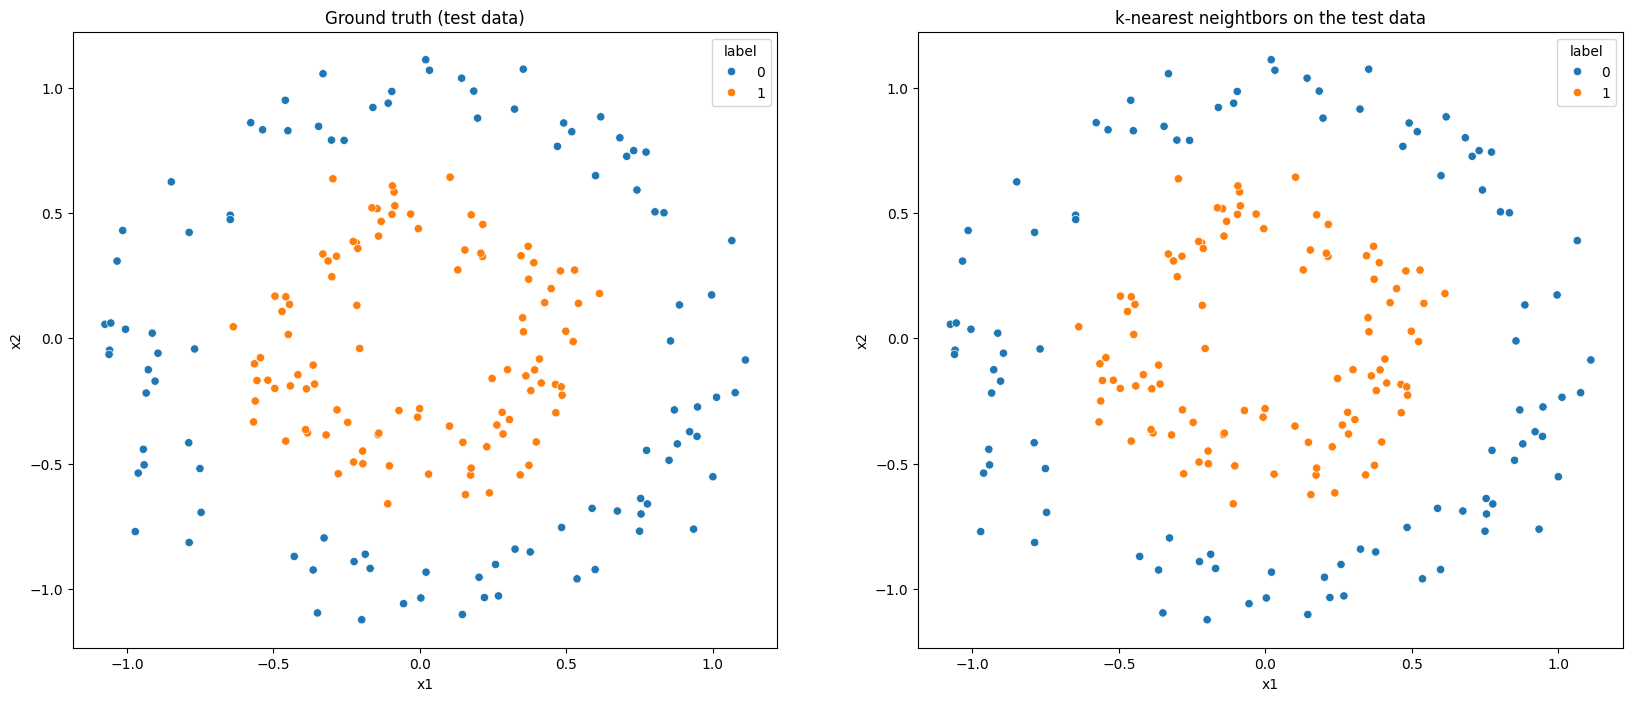

In [28]:
k = 3 # k for nearest neighbors


from collections import Counter

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn(X_train, Y_train, X_test, k):
    predictions = []

    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]

        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [Y_train[i] for i in k_indices]

        most_common_label = Counter(k_nearest_labels).most_common(n=1)[0][0]
        predictions.append(most_common_label)

    return predictions

def acc(x_train, y_train, x_test, y_test):
    pred = np.array(knn(x_train, y_train, x_test, k))

    return (y_test == pred).astype(float).mean()



############################## TO BE GRADED ####################################

# estimate the training and test accuracy
# Hint: The test accuracy should be above 98%
train_accuracy = acc(X_train, Y_train, X_train, Y_train)

test_accuracy = acc(X_train, Y_train, X_test, Y_test)

print(f'Train accuracy: {train_accuracy:0.4f}, Test accuracy: {test_accuracy:0.4f}')

################################################################################

############################## TO BE GRADED ####################################

# Plot the test data points in the x1, x2 plane with different colors corresponding to the labels
# Plot this figure for the true and predicted labels (two plots)

fig, axes = plt.subplots(1, 2, figsize = (20, 8))
ax = sns.scatterplot(x = 'x1', y = 'x2', hue = 'label', data = test_circles, ax = axes[0])
ax.set_title('Ground truth (test data)')

pred_circles = pd.DataFrame({'x1': X_test[:, 0], 'x2': X_test[:, 1], 'label': np.array(knn(X_train, Y_train, X_test, k))})

ax = sns.scatterplot(x = 'x1', y = 'x2', hue = 'label', data = pred_circles, ax = axes[1])
ax.set_title('k-nearest neightbors on the test data')

#### Numpy friendly code

Train accuracy: 0.9988, Test accuracy: 0.9950


Text(0.5, 1.0, 'k-nearest neightbors on the test data')

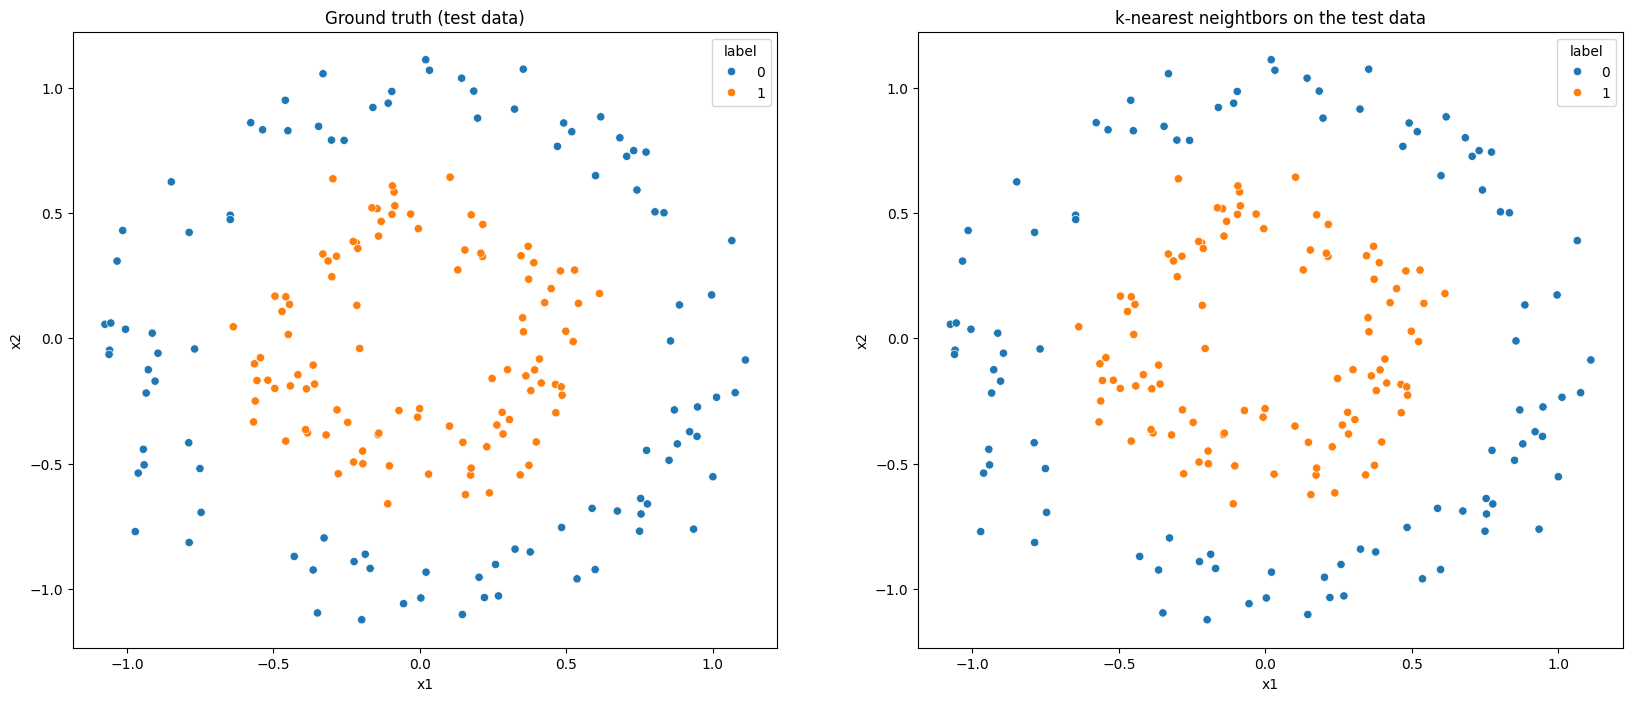

In [29]:
k = 3 # k for nearest neighbors

train_dist = np.linalg.norm(X_train[:, None, :] - X_train[None, :, :], axis=-1) # distance
test_dist = np.linalg.norm(X_test[:, None, :] - X_test[None, :, :], axis=-1)
pred_Y_train = np.zeros_like(Y_train)
pred_Y_test = np.zeros_like(Y_test)

for i, row in enumerate(train_dist):
    idx = np.argpartition(row, k)[:k]
    values = Y_train[idx]
    pred_Y_train[i] = (1/k * values.sum()) > 0.5

for i, row in enumerate(test_dist):
    idx = np.argpartition(row, k)[:k]
    values = Y_test[idx]
    pred_Y_test[i] = (1/k * values.sum()) > 0.5



############################## TO BE GRADED ####################################

# estimate the training and test accuracy
# Hint: The test accuracy should be above 98%
train_accuracy = np.mean(pred_Y_train == Y_train)

test_accuracy = np.mean(pred_Y_test == Y_test)

print(f'Train accuracy: {train_accuracy:0.4f}, Test accuracy: {test_accuracy:0.4f}')

################################################################################

############################## TO BE GRADED ####################################

# Plot the test data points in the x1, x2 plane with different colors corresponding to the labels
# Plot this figure for the true and predicted labels (two plots)

fig, axes = plt.subplots(1, 2, figsize = (20, 8))
ax = sns.scatterplot(x = 'x1', y = 'x2', hue = 'label', data = test_circles, ax = axes[0])
ax.set_title('Ground truth (test data)')

pred_circles = pd.DataFrame({'x1': X_test[:, 0], 'x2': X_test[:, 1], 'label': np.array(knn(X_train, Y_train, X_test, k))})

ax = sns.scatterplot(x = 'x1', y = 'x2', hue = 'label', data = pred_circles, ax = axes[1])
ax.set_title('k-nearest neightbors on the test data')